# RMOTR FINAL PROJECT QUESTION #4
# Which are the top-three the most common dev types per country? And which are the best paid ones?

1. Split dev type into dummy variables
- Group by country to check for correlations
- Create a heat map to visualize possible correlations
- Create a heat map with a subset of the data to visualize only a few countries at a time
- Create a bar plot using the average salary per job category worldwide.  The data had to be manipulated to calculate the averages.
- Create a bar plot using the top 3 salaries per country, then use the final count of these developers worldwide to create the resultant plot.

In [1]:
# Init libraries and import zip file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from zipfile import ZipFile

# magic function that renders the figure in a notebook
%matplotlib inline

In [2]:
zip_file = ZipFile('data/stack-overflow-2018-developer-survey.zip')

In [3]:
# survey_results_public.csv
full_df = pd.read_csv(zip_file.open('survey_results_public.csv'),low_memory=False)
#full_df = pd.read_csv(zip_file.open('survey_results_public.csv'))
full_df.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


# Reduced original data set for checking other variables

In [4]:
text_data_set = 'Country,CompanySize,CareerSatisfaction,Employment,FormalEducation,UndergradMajor,DevType,YearsCoding,YearsCodingProf,SalaryType,ConvertedSalary,EducationTypes,SelfTaughtTypes,LanguageWorkedWith,DatabaseWorkedWith,PlatformWorkedWith,FrameworkWorkedWith,OperatingSystem,Gender,SexualOrientation,RaceEthnicity,Age'
reduced_data_columns = text_data_set.split(',')
print(reduced_data_columns)

['Country', 'CompanySize', 'CareerSatisfaction', 'Employment', 'FormalEducation', 'UndergradMajor', 'DevType', 'YearsCoding', 'YearsCodingProf', 'SalaryType', 'ConvertedSalary', 'EducationTypes', 'SelfTaughtTypes', 'LanguageWorkedWith', 'DatabaseWorkedWith', 'PlatformWorkedWith', 'FrameworkWorkedWith', 'OperatingSystem', 'Gender', 'SexualOrientation', 'RaceEthnicity', 'Age']


In [5]:
reduced_df = full_df[reduced_data_columns]

In [6]:
reduced_df.shape

(98855, 22)

In [7]:
reduced_df.dropna(inplace=True) # get rid of NaN data

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
reduced_df.shape

(13860, 22)

In [9]:
reduced_df.reset_index(inplace=True,drop=True) # fix the index and drop the old index values from being added as a column

In [10]:
reduced_df.shape

(13860, 22)

In [11]:
reduced_df.head()

,Country,CompanySize,CareerSatisfaction,Employment,FormalEducation,UndergradMajor,DevType,YearsCoding,YearsCodingProf,SalaryType,...,SelfTaughtTypes,LanguageWorkedWith,DatabaseWorkedWith,PlatformWorkedWith,FrameworkWorkedWith,OperatingSystem,Gender,SexualOrientation,RaceEthnicity,Age
0,United Kingdom,"10,000 or more employees",Neither satisfied nor dissatisfied,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Yearly,...,The official documentation and/or standards fo...,JavaScript;Python;Bash/Shell,Redis;PostgreSQL;Memcached,Linux,Django,Linux-based,Male,Straight or heterosexual,White or of European descent,35 - 44 years old
1,United States,"10,000 or more employees",Moderately satisfied,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Back-end developer;Front-end developer;Full-st...,9-11 years,0-2 years,Yearly,...,The official documentation and/or standards fo...,JavaScript;HTML;CSS,MongoDB,Linux,Node.js;React,MacOS,Male,Straight or heterosexual,White or of European descent,18 - 24 years old
2,United States,100 to 499 employees,Moderately satisfied,Employed full-time,Some college/university study without earning ...,Fine arts or performing arts (ex. graphic desi...,"Back-end developer;C-suite executive (CEO, CTO...",30 or more years,21-23 years,Yearly,...,The official documentation and/or standards fo...,Assembly;CoffeeScript;Erlang;Go;JavaScript;Lua...,Redis;PostgreSQL;Amazon DynamoDB;Apache HBase;...,Amazon Echo;AWS;iOS;Linux;Mac OS;Serverless,Hadoop;Node.js;React;Spark,MacOS,Male,Straight or heterosexual,White or of European descent,35 - 44 years old
3,United Kingdom,20 to 99 employees,Neither satisfied nor dissatisfied,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Back-end developer;Database administrator;Desi...,9-11 years,6-8 years,Monthly,...,Questions & answers on Stack Overflow,C#;JavaScript;PHP;SQL;HTML;CSS,MySQL,Linux;Mac OS;Windows Desktop or Server,.NET Core,Windows,Male,Straight or heterosexual,White or of European descent,25 - 34 years old
4,Poland,20 to 99 employees,Slightly satisfied,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Back-end developer;Engineering manager,3-5 years,3-5 years,Monthly,...,The official documentation and/or standards fo...,Python;SQL;HTML;Bash/Shell,MongoDB;Redis;MySQL;PostgreSQL,Linux,Django,Linux-based,Male,Straight or heterosexual,White or of European descent,25 - 34 years old


# Subset of the data that is only DevType and Country?

In [12]:
reduced_df['Country'].head()

0    United Kingdom
1     United States
2     United States
3    United Kingdom
4            Poland
Name: Country, dtype: object

In [13]:
reduced_df['DevType'].head()

0    Database administrator;DevOps specialist;Full-...
1    Back-end developer;Front-end developer;Full-st...
2    Back-end developer;C-suite executive (CEO, CTO...
3    Back-end developer;Database administrator;Desi...
4               Back-end developer;Engineering manager
Name: DevType, dtype: object

In [14]:
df_dev_country = reduced_df[['Country','DevType']]
df_dev_country.head()

,Country,DevType
0,United Kingdom,Database administrator;DevOps specialist;Full-...
1,United States,Back-end developer;Front-end developer;Full-st...
2,United States,"Back-end developer;C-suite executive (CEO, CTO..."
3,United Kingdom,Back-end developer;Database administrator;Desi...
4,Poland,Back-end developer;Engineering manager


In [15]:
#df['Country'].dtypes # dtype('O')

In [16]:
#df.DevType.dtype # dtype('O')

In [17]:
#df.Respondent.dtypes # dtype('int64')

# Split DevType into columns based on dummies

In [18]:
dt_dummies = pd.get_dummies(df_dev_country['DevType'].str.split(';',expand=True).apply(lambda s: s.str.strip()).stack(),prefix="DevType").sum(level=0)
dt_dummies.head()

,DevType_Back-end developer,"DevType_C-suite executive (CEO, CTO, etc.)",DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_Desktop or enterprise applications developer,DevType_DevOps specialist,DevType_Educator or academic researcher,DevType_Embedded applications or devices developer,DevType_Engineering manager,DevType_Front-end developer,DevType_Full-stack developer,DevType_Game or graphics developer,DevType_Marketing or sales professional,DevType_Mobile developer,DevType_Product manager,DevType_QA or test developer,DevType_Student,DevType_System administrator
0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
2,1,1,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1
3,1,0,0,0,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


# Concat the data

In [19]:
#smaller_data = pd.concat([emp_dummies,formal_dummies],axis=1,sort=False)
df_dc = pd.concat([reduced_df['Country'],dt_dummies],axis=1)
df_dc.head()

,Country,DevType_Back-end developer,"DevType_C-suite executive (CEO, CTO, etc.)",DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_Desktop or enterprise applications developer,DevType_DevOps specialist,DevType_Educator or academic researcher,...,DevType_Engineering manager,DevType_Front-end developer,DevType_Full-stack developer,DevType_Game or graphics developer,DevType_Marketing or sales professional,DevType_Mobile developer,DevType_Product manager,DevType_QA or test developer,DevType_Student,DevType_System administrator
0,United Kingdom,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,United States,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,United States,1,1,1,0,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1
3,United Kingdom,1,0,0,0,1,1,1,0,0,...,0,1,1,0,0,0,0,0,0,0
4,Poland,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# GroupBy

In [20]:
gb_df_dc = df_dc.groupby(df_dc['Country']).sum()
gb_df_dc.head(10)

,DevType_Back-end developer,"DevType_C-suite executive (CEO, CTO, etc.)",DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_Desktop or enterprise applications developer,DevType_DevOps specialist,DevType_Educator or academic researcher,DevType_Embedded applications or devices developer,DevType_Engineering manager,DevType_Front-end developer,DevType_Full-stack developer,DevType_Game or graphics developer,DevType_Marketing or sales professional,DevType_Mobile developer,DevType_Product manager,DevType_QA or test developer,DevType_Student,DevType_System administrator
Country,,,,,,,,,,,,,,,,,,,,
Albania,5.0,1.0,1.0,0.0,3.0,0.0,2.0,1.0,1.0,0.0,0.0,3.0,7.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
Algeria,2.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0
Andorra,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Argentina,66.0,3.0,8.0,5.0,11.0,8.0,15.0,12.0,5.0,4.0,10.0,41.0,65.0,3.0,0.0,19.0,5.0,5.0,11.0,11.0
Armenia,9.0,1.0,1.0,1.0,3.0,0.0,2.0,3.0,2.0,0.0,1.0,5.0,4.0,2.0,0.0,1.0,1.0,1.0,0.0,2.0
Australia,238.0,13.0,37.0,29.0,62.0,38.0,70.0,72.0,8.0,11.0,29.0,156.0,247.0,11.0,1.0,75.0,17.0,28.0,6.0,61.0
Austria,85.0,3.0,10.0,11.0,23.0,9.0,33.0,21.0,5.0,9.0,10.0,53.0,66.0,2.0,0.0,26.0,7.0,10.0,12.0,22.0
Azerbaijan,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Bahrain,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0


# Heatmap based on COUNT of developer type per country

# 4. The heatmap shows that Back-end Developer, Front-End, and Full-Stack are the 3 most common dev types per country.

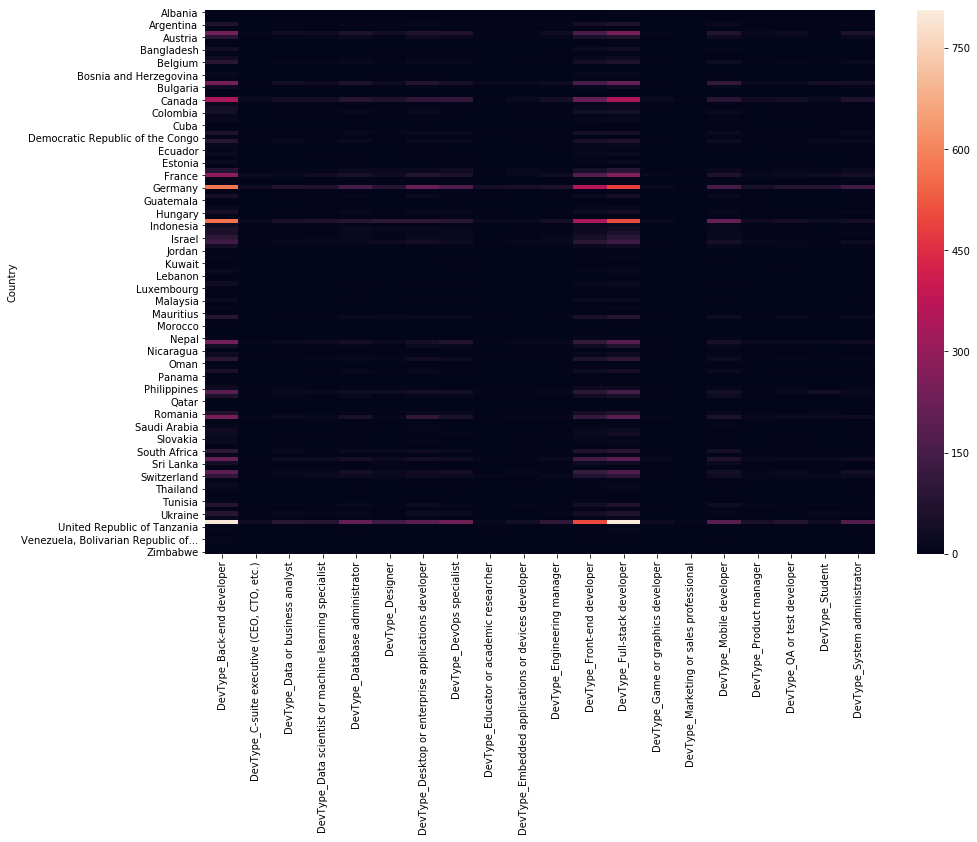

In [21]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(gb_df_dc.drop('United States')) # remove United States because it's skewing the data

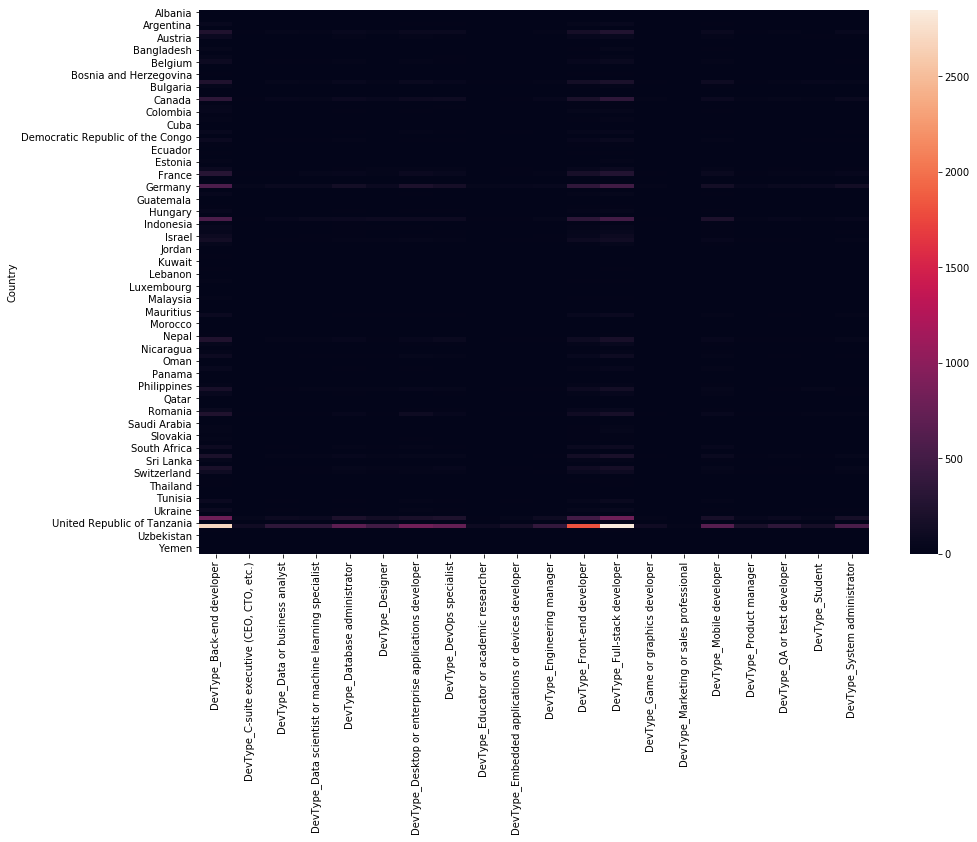

In [22]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(gb_df_dc)

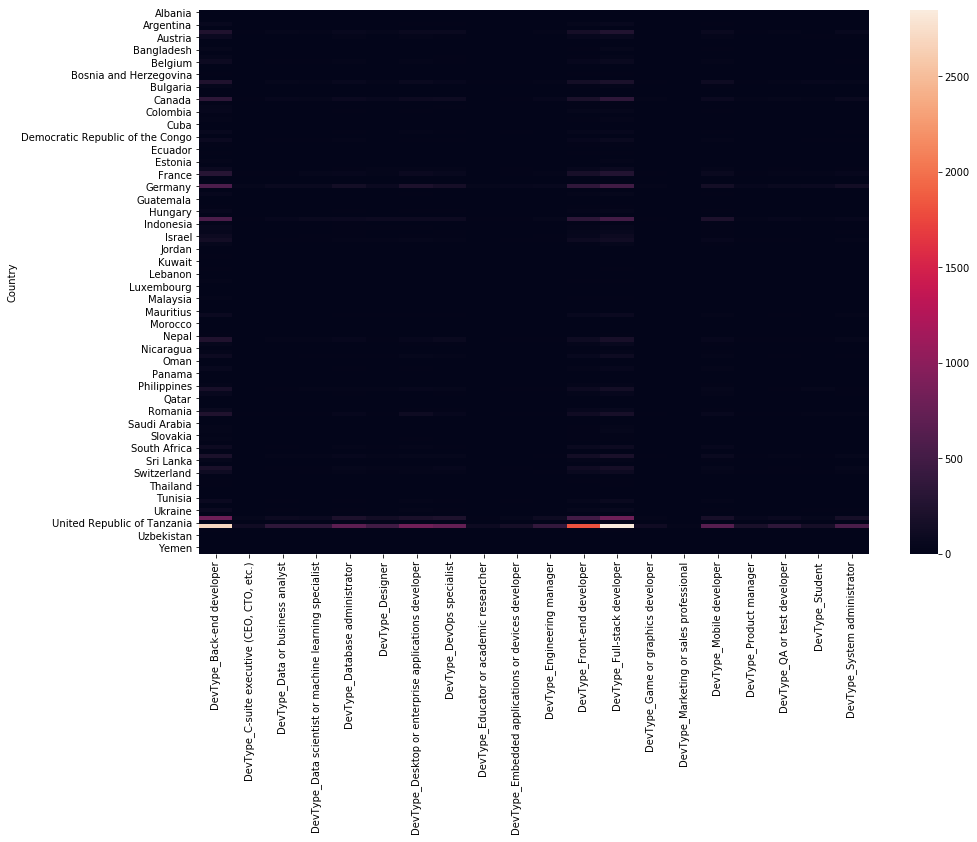

In [23]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(gb_df_dc)

In [24]:
gb_df_dc.shape

(131, 20)

In [25]:
# https://stackoverflow.com/questions/20069009/pandas-get-topmost-n-records-within-each-group
gb_df_dc2 = df_dc.groupby(df_dc['Country']).sum()
#df.groupby('id').head(2)
gb_df_dc2.head()

,DevType_Back-end developer,"DevType_C-suite executive (CEO, CTO, etc.)",DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_Desktop or enterprise applications developer,DevType_DevOps specialist,DevType_Educator or academic researcher,DevType_Embedded applications or devices developer,DevType_Engineering manager,DevType_Front-end developer,DevType_Full-stack developer,DevType_Game or graphics developer,DevType_Marketing or sales professional,DevType_Mobile developer,DevType_Product manager,DevType_QA or test developer,DevType_Student,DevType_System administrator
Country,,,,,,,,,,,,,,,,,,,,
Albania,5.0,1.0,1.0,0.0,3.0,0.0,2.0,1.0,1.0,0.0,0.0,3.0,7.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
Algeria,2.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0
Andorra,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Argentina,66.0,3.0,8.0,5.0,11.0,8.0,15.0,12.0,5.0,4.0,10.0,41.0,65.0,3.0,0.0,19.0,5.0,5.0,11.0,11.0
Armenia,9.0,1.0,1.0,1.0,3.0,0.0,2.0,3.0,2.0,0.0,1.0,5.0,4.0,2.0,0.0,1.0,1.0,1.0,0.0,2.0


In [26]:
#gb_df_dc2['Albania']
#gb_df_dc2['DevType_Back-end developer']

# Heatmap for a few countries

In [27]:
#fig, ax = plt.subplots(figsize=(15, 10))
#sns.heatmap(gb_df_dc[gb_df_dc['Albania']], ax=ax)
gb_df_dc2.head()
gb_df_dc2.loc[['Albania','China','France','Germany','Hong Kong (S.A.R.)','United States']]

,DevType_Back-end developer,"DevType_C-suite executive (CEO, CTO, etc.)",DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_Desktop or enterprise applications developer,DevType_DevOps specialist,DevType_Educator or academic researcher,DevType_Embedded applications or devices developer,DevType_Engineering manager,DevType_Front-end developer,DevType_Full-stack developer,DevType_Game or graphics developer,DevType_Marketing or sales professional,DevType_Mobile developer,DevType_Product manager,DevType_QA or test developer,DevType_Student,DevType_System administrator
Country,,,,,,,,,,,,,,,,,,,,
Albania,5.0,1.0,1.0,0.0,3.0,0.0,2.0,1.0,1.0,0.0,0.0,3.0,7.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
China,42.0,0.0,6.0,9.0,6.0,9.0,8.0,12.0,1.0,2.0,4.0,18.0,21.0,4.0,0.0,5.0,3.0,6.0,5.0,7.0
France,291.0,21.0,18.0,37.0,51.0,29.0,79.0,57.0,5.0,14.0,29.0,180.0,265.0,13.0,4.0,69.0,18.0,24.0,27.0,47.0
Germany,575.0,36.0,75.0,70.0,151.0,88.0,219.0,164.0,42.0,51.0,63.0,359.0,480.0,24.0,7.0,146.0,51.0,76.0,80.0,139.0
Hong Kong (S.A.R.),22.0,3.0,3.0,5.0,5.0,3.0,3.0,5.0,3.0,1.0,2.0,13.0,18.0,2.0,1.0,8.0,4.0,3.0,2.0,6.0
United States,2694.0,116.0,351.0,350.0,680.0,480.0,818.0,728.0,93.0,160.0,389.0,1822.0,2847.0,117.0,32.0,641.0,196.0,353.0,160.0,550.0


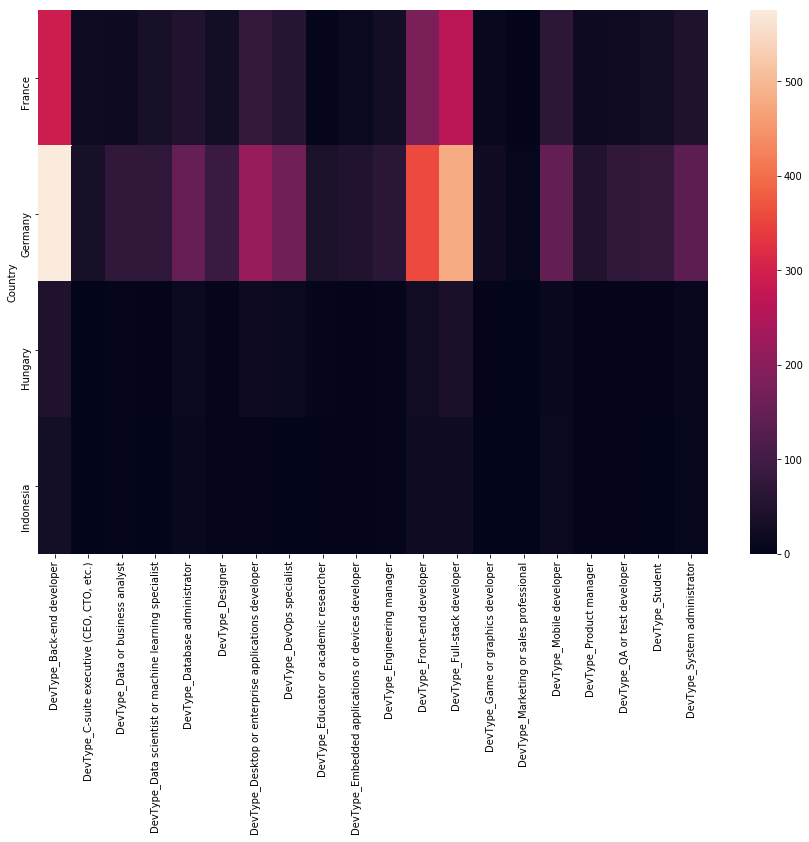

In [28]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(gb_df_dc2.loc[['France','Germany','Hungary','Indonesia']], ax=ax)

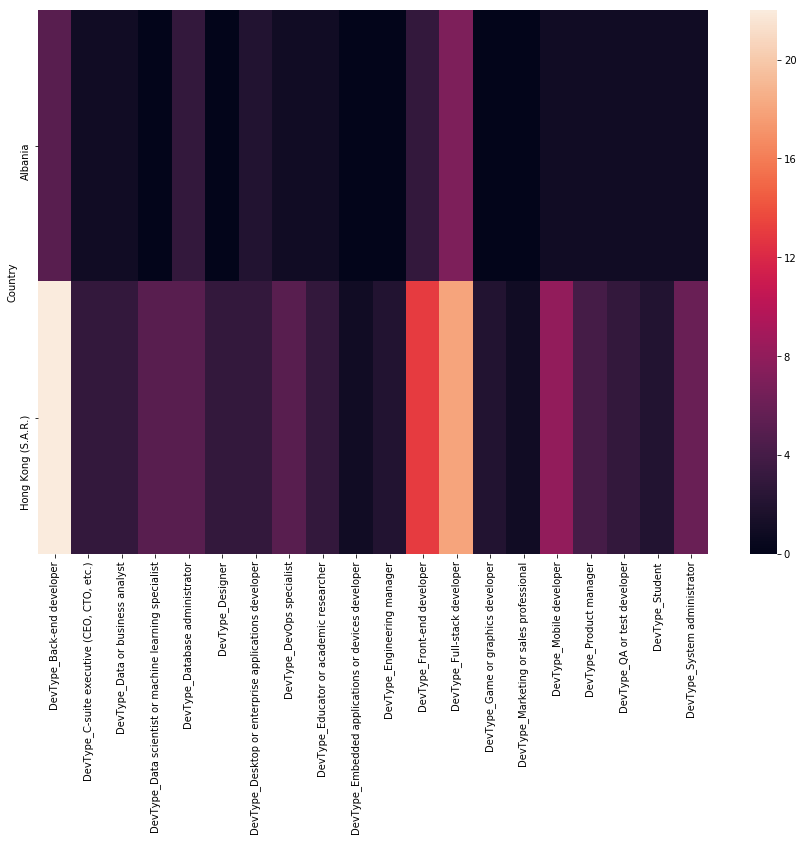

In [29]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(gb_df_dc2.loc[['Albania','Hong Kong (S.A.R.)']], ax=ax)

In [30]:
# Checking Albania as one example.

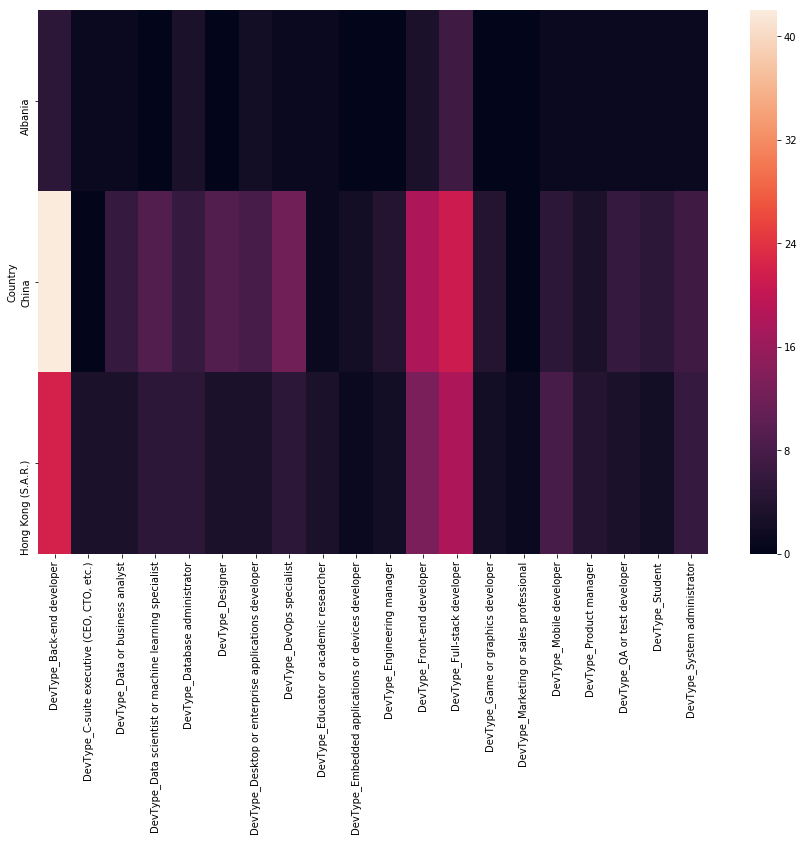

In [31]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(gb_df_dc2.loc[['Albania','China','Hong Kong (S.A.R.)']], ax=ax)

# 4. Looks like Back-end Developer, Front-End, and Full-Stack are the 3 most common dev types per country.

# Best (highest) paid developers per country?

## Concat the data

In [32]:
# create dummies for 

In [33]:
#smaller_data = pd.concat([emp_dummies,formal_dummies],axis=1,sort=False)

# SALARY VS DevType
df_sal_dt = pd.concat([reduced_df['ConvertedSalary'],dt_dummies],axis=1)
df_sal_dt.head(10)

,ConvertedSalary,DevType_Back-end developer,"DevType_C-suite executive (CEO, CTO, etc.)",DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_Desktop or enterprise applications developer,DevType_DevOps specialist,DevType_Educator or academic researcher,...,DevType_Engineering manager,DevType_Front-end developer,DevType_Full-stack developer,DevType_Game or graphics developer,DevType_Marketing or sales professional,DevType_Mobile developer,DevType_Product manager,DevType_QA or test developer,DevType_Student,DevType_System administrator
0,70841.0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,120000.0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,250000.0,1,1,1,0,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1
3,420.0,1,0,0,0,1,1,1,0,0,...,0,1,1,0,0,0,0,0,0,0
4,30000.0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,80000.0,1,0,0,0,1,0,0,1,0,...,0,1,1,0,0,1,0,0,0,0
6,6576.0,1,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
7,115000.0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,73428.0,1,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,1
9,13212.0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [34]:
df_sal_dt.tail(10)

,ConvertedSalary,DevType_Back-end developer,"DevType_C-suite executive (CEO, CTO, etc.)",DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_Desktop or enterprise applications developer,DevType_DevOps specialist,DevType_Educator or academic researcher,...,DevType_Engineering manager,DevType_Front-end developer,DevType_Full-stack developer,DevType_Game or graphics developer,DevType_Marketing or sales professional,DevType_Mobile developer,DevType_Product manager,DevType_QA or test developer,DevType_Student,DevType_System administrator
13850,170000.0,1,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
13851,73428.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
13852,276.0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
13853,6000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13854,30597.0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
13855,111963.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13856,21228.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13857,52872.0,1,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1
13858,36720.0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
13859,165000.0,1,1,0,1,0,0,0,0,0,...,1,1,1,0,0,0,1,0,0,0


In [35]:
df_sal_dt.shape

(13860, 21)

In [36]:
df_sal_dt.sum(axis=0)[0]

1528881699.0

In [37]:
df_sal_dt['ConvertedSalary'].iloc[0]

70841.0

In [38]:
# summary for each developer type
# found out that each one is broken into 
developer_count = {}
developer_salary = {}
count = 0

for column_name,column_data in df_sal_dt.items():
    #print("COL NAME:", column_name,"(data below)\n", column_data)
    #break
    ###print("COLUMN DATA:\n", column_data)
    #print("COLUMN DATA[0]:\n", column_data[0]) # get the row in each column
    #print("COLUMN DATA[1]:\n", column_data[1]) # get the row in each column
    
    #print(len(column_data)) # proved this has the full column
    
    if column_name not in developer_count:
        developer_count[column_name] = 0
        developer_salary[column_name] = 0
    
    for row in range(len(column_data)):
        #print("ROW?",column_data[row])
        #print("column name:", column_name)
        #print("CE", col_element)
        #break
        if column_data[row] == 1:
            developer_count[column_name] += 1
            developer_salary[column_name] += df_sal_dt['ConvertedSalary'].iloc[row]
            #print("SALARY:",df_sal_dt['ConvertedSalary'].iloc[row])

### DEBUG CODE
#     count += 1
#     if count > 3:
#         break

In [39]:
developer_count

{'ConvertedSalary': 0,
 'DevType_Back-end developer': 9539,
 'DevType_C-suite executive (CEO, CTO, etc.)': 451,
 'DevType_Data or business analyst': 1138,
 'DevType_Data scientist or machine learning specialist': 1128,
 'DevType_Database administrator': 2230,
 'DevType_Designer': 1458,
 'DevType_Desktop or enterprise applications developer': 2698,
 'DevType_DevOps specialist': 2327,
 'DevType_Educator or academic researcher': 395,
 'DevType_Embedded applications or devices developer': 595,
 'DevType_Engineering manager': 1092,
 'DevType_Front-end developer': 5947,
 'DevType_Full-stack developer': 9026,
 'DevType_Game or graphics developer': 426,
 'DevType_Marketing or sales professional': 95,
 'DevType_Mobile developer': 2669,
 'DevType_Product manager': 695,
 'DevType_QA or test developer': 1072,
 'DevType_Student': 780,
 'DevType_System administrator': 1760}

In [40]:
developer_salary['DevType_Back-end developer']

1028794025.0

In [41]:
developer_count['DevType_Back-end developer']

9539

In [42]:
developer_salary['DevType_C-suite executive (CEO, CTO, etc.)']

60011428.0

In [43]:
developer_count['DevType_C-suite executive (CEO, CTO, etc.)']

451

## DEVELOPER AVERAGES

In [44]:
developer_average_salary = {}

for key,value in developer_count.items():
    #print(key)
    try:
        developer_average_salary[key] = developer_salary[key]/developer_count[key]
    except:
        pass

# for x in zip(developer_average_salary,developer_average_salary)
# = developer_salary/developer_count

In [45]:
developer_average_salary

{'DevType_Back-end developer': 107851.3497221931,
 'DevType_C-suite executive (CEO, CTO, etc.)': 133063.0332594235,
 'DevType_Data or business analyst': 122489.8848857645,
 'DevType_Data scientist or machine learning specialist': 120145.71631205674,
 'DevType_Database administrator': 106291.74529147982,
 'DevType_Designer': 105317.94170096022,
 'DevType_Desktop or enterprise applications developer': 109202.10340993329,
 'DevType_DevOps specialist': 120235.644177052,
 'DevType_Educator or academic researcher': 103480.41012658228,
 'DevType_Embedded applications or devices developer': 101268.57647058823,
 'DevType_Engineering manager': 135965.75824175825,
 'DevType_Front-end developer': 108692.25643181436,
 'DevType_Full-stack developer': 111729.80157323288,
 'DevType_Game or graphics developer': 101167.4131455399,
 'DevType_Marketing or sales professional': 105973.84210526316,
 'DevType_Mobile developer': 93761.91007868115,
 'DevType_Product manager': 121370.77122302158,
 'DevType_QA or

In [46]:
#df['class'].value_counts().plot('bar')
df_dev_avg = pd.DataFrame.from_dict(developer_average_salary,orient='index')
df_dev_avg

,0
DevType_Back-end developer,107851.349722
"DevType_C-suite executive (CEO, CTO, etc.)",133063.033259
DevType_Data or business analyst,122489.884886
DevType_Data scientist or machine learning specialist,120145.716312
DevType_Database administrator,106291.745291
DevType_Designer,105317.941701
DevType_Desktop or enterprise applications developer,109202.103410
DevType_DevOps specialist,120235.644177
DevType_Educator or academic researcher,103480.410127
DevType_Embedded applications or devices developer,101268.576471


# 4. In the reduced data set, using the average salary per category, C-suite executive, Engineering Manager, and Data or Business Analyst had the highest average salary over all the countries polled.

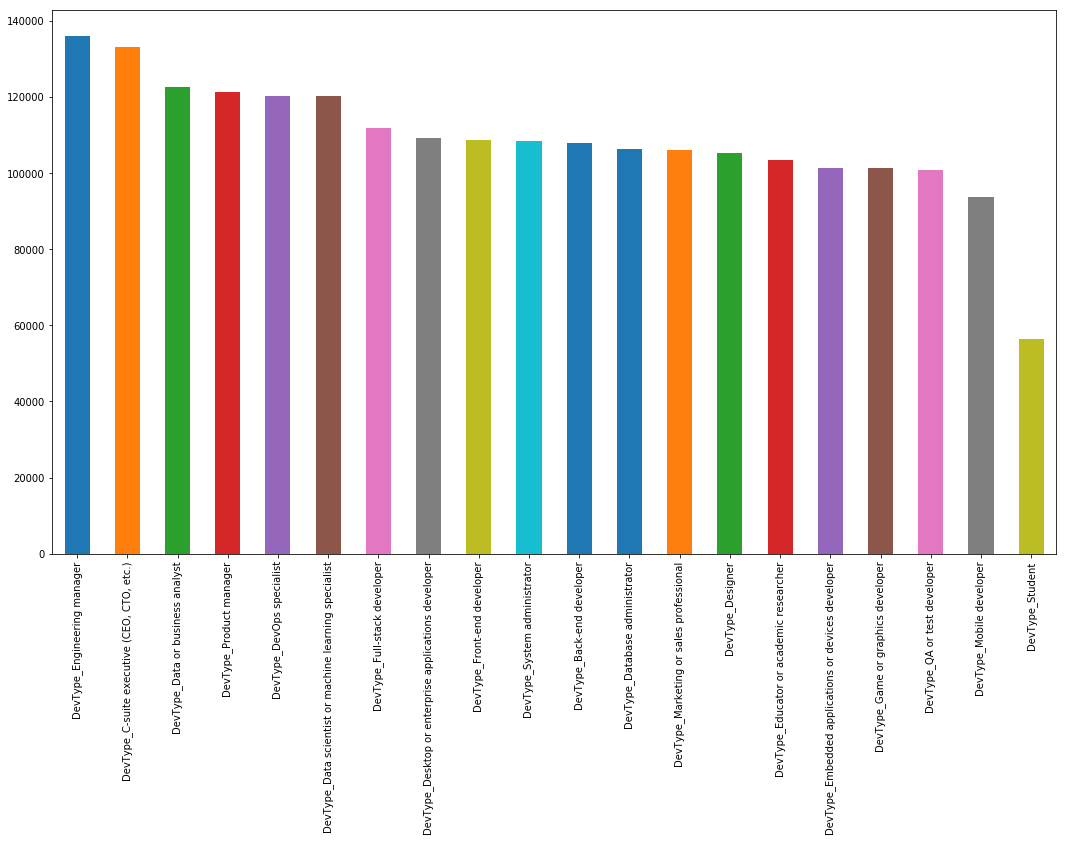

In [47]:
#bar plot of values in sorted order from biggest to smallest
df_dev_avg[0].sort_values(ascending=False).plot('bar',figsize=(18, 10))

# Top 3 salaries per country

In [48]:
df_cy_cs = pd.concat([reduced_df['ConvertedSalary'],reduced_df['Country'],dt_dummies],axis=1)
df_cy_cs.head()

,ConvertedSalary,Country,DevType_Back-end developer,"DevType_C-suite executive (CEO, CTO, etc.)",DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_Desktop or enterprise applications developer,DevType_DevOps specialist,...,DevType_Engineering manager,DevType_Front-end developer,DevType_Full-stack developer,DevType_Game or graphics developer,DevType_Marketing or sales professional,DevType_Mobile developer,DevType_Product manager,DevType_QA or test developer,DevType_Student,DevType_System administrator
0,70841.0,United Kingdom,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,120000.0,United States,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,250000.0,United States,1,1,1,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,1
3,420.0,United Kingdom,1,0,0,0,1,1,1,0,...,0,1,1,0,0,0,0,0,0,0
4,30000.0,Poland,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [49]:
df_cy_cs.groupby(['Country']).sum()

,ConvertedSalary,DevType_Back-end developer,"DevType_C-suite executive (CEO, CTO, etc.)",DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_Desktop or enterprise applications developer,DevType_DevOps specialist,DevType_Educator or academic researcher,...,DevType_Engineering manager,DevType_Front-end developer,DevType_Full-stack developer,DevType_Game or graphics developer,DevType_Marketing or sales professional,DevType_Mobile developer,DevType_Product manager,DevType_QA or test developer,DevType_Student,DevType_System administrator
Country,,,,,,,,,,,,,,,,,,,,,
Albania,170340.0,5.0,1.0,1.0,0.0,3.0,0.0,2.0,1.0,1.0,...,0.0,3.0,7.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
Algeria,33331.0,2.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,...,0.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0
Andorra,48955.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Argentina,3565757.0,66.0,3.0,8.0,5.0,11.0,8.0,15.0,12.0,5.0,...,10.0,41.0,65.0,3.0,0.0,19.0,5.0,5.0,11.0,11.0
Armenia,881284.0,9.0,1.0,1.0,1.0,3.0,0.0,2.0,3.0,2.0,...,1.0,5.0,4.0,2.0,0.0,1.0,1.0,1.0,0.0,2.0
Australia,46117250.0,238.0,13.0,37.0,29.0,62.0,38.0,70.0,72.0,8.0,...,29.0,156.0,247.0,11.0,1.0,75.0,17.0,28.0,6.0,61.0
Austria,7812733.0,85.0,3.0,10.0,11.0,23.0,9.0,33.0,21.0,5.0,...,10.0,53.0,66.0,2.0,0.0,26.0,7.0,10.0,12.0,22.0
Azerbaijan,35496.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Bahrain,41280.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,2.0,2.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0


In [50]:
# top 3 salaries per country
top_3_sal_by_country = df_cy_cs.groupby(['Country']).apply(lambda grp: grp.nlargest(3, 'ConvertedSalary'))
top_3_sal_by_country

ConvertedSalary  \
Country                                                       
Albania                              5391           40000.0   
                                     3658           35244.0   
                                     7585           24000.0   
Algeria                              9361           15768.0   
                                     7214            9463.0   
                                     11057           4728.0   
Andorra                              7871           48955.0   
Argentina                            13140        1020000.0   
                                     4526           72000.0   
                                     12048          69924.0   
Armenia                              1095          576000.0   
                                     10652          77716.0   
                                     12753          64800.0   
Australia                            276          1000000.0   
                                     2599         1000000.0   
                                     2751         1000000.0   
Austria                              8007         1000000.0   
                                     2082          881196.0   
                                     7602          151095.0   
Azerbaijan                           12670          18456.0   
                                     2206            5676.0   
                                     4794            5676.0   
Bahrain                              2461           29280.0   
                                     945            12000.0   
Bangladesh                           2111          360000.0   
                                     5200          187668.0   
                                     7841           93840.0   
Barbados                             13632          20964.0   
Belarus                              10254          76800.0   
                                     13091          52800.0   
...                                                     ...   
Uganda                               12581          24000.0   
Ukraine                              6700          960000.0   
                                     11183         102900.0   
                                     4550           96000.0   
United Arab Emirates                 1864          500000.0   
                                     2063          300000.0   
                                     6011          163356.0   
United Kingdom                       6037         1200000.0   
                                     965          1000000.0   
                                     1558         1000000.0   
United Republic of Tanzania          3841           24432.0   
                                     10215          24048.0   
United States                        84           2000000.0   
                                     102          2000000.0   
                                     267          2000000.0   
Uruguay                              3123          384000.0   
                                     12445          70000.0   
                                     10271          56000.0   
Uzbekistan                           8883           17652.0   
                                     1873           15000.0   
Venezuela, Bolivarian Republic of... 9090         1000000.0   
                                     8919          960480.0   
                                     3929          840420.0   
Viet Nam                             5817           43200.0   
                                     11964          39108.0   
                                     3717           30000.0   
Yemen                                7916           12000.0   
Zimbabwe                             4279         1000000.0   
                                     10340           6000.0   
                                     13298           2400.0   

                                                                         C

In [51]:
highest_paid = df_cy_cs.groupby(['Country']).apply(lambda grp: grp.nlargest(3, 'ConvertedSalary'))

In [52]:
highest_paid.isna().sum()

ConvertedSalary                                          0
Country                                                  0
DevType_Back-end developer                               0
DevType_C-suite executive (CEO, CTO, etc.)               0
DevType_Data or business analyst                         0
DevType_Data scientist or machine learning specialist    0
DevType_Database administrator                           0
DevType_Designer                                         0
DevType_Desktop or enterprise applications developer     0
DevType_DevOps specialist                                0
DevType_Educator or academic researcher                  0
DevType_Embedded applications or devices developer       0
DevType_Engineering manager                              0
DevType_Front-end developer                              0
DevType_Full-stack developer                             0
DevType_Game or graphics developer                       0
DevType_Marketing or sales professional                 

## Count of highest paid developers per country

In [53]:
# Sum of developers per country
df_cy_cs.groupby(['Country']).sum()

,ConvertedSalary,DevType_Back-end developer,"DevType_C-suite executive (CEO, CTO, etc.)",DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_Desktop or enterprise applications developer,DevType_DevOps specialist,DevType_Educator or academic researcher,...,DevType_Engineering manager,DevType_Front-end developer,DevType_Full-stack developer,DevType_Game or graphics developer,DevType_Marketing or sales professional,DevType_Mobile developer,DevType_Product manager,DevType_QA or test developer,DevType_Student,DevType_System administrator
Country,,,,,,,,,,,,,,,,,,,,,
Albania,170340.0,5.0,1.0,1.0,0.0,3.0,0.0,2.0,1.0,1.0,...,0.0,3.0,7.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
Algeria,33331.0,2.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,...,0.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0
Andorra,48955.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Argentina,3565757.0,66.0,3.0,8.0,5.0,11.0,8.0,15.0,12.0,5.0,...,10.0,41.0,65.0,3.0,0.0,19.0,5.0,5.0,11.0,11.0
Armenia,881284.0,9.0,1.0,1.0,1.0,3.0,0.0,2.0,3.0,2.0,...,1.0,5.0,4.0,2.0,0.0,1.0,1.0,1.0,0.0,2.0
Australia,46117250.0,238.0,13.0,37.0,29.0,62.0,38.0,70.0,72.0,8.0,...,29.0,156.0,247.0,11.0,1.0,75.0,17.0,28.0,6.0,61.0
Austria,7812733.0,85.0,3.0,10.0,11.0,23.0,9.0,33.0,21.0,5.0,...,10.0,53.0,66.0,2.0,0.0,26.0,7.0,10.0,12.0,22.0
Azerbaijan,35496.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Bahrain,41280.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,2.0,2.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0


In [54]:
type(top_3_sal_by_country) # double checking that this is a dataframe

pandas.core.frame.DataFrame

In [55]:
df_cy_cs.groupby(['Country']).sum()

,ConvertedSalary,DevType_Back-end developer,"DevType_C-suite executive (CEO, CTO, etc.)",DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_Desktop or enterprise applications developer,DevType_DevOps specialist,DevType_Educator or academic researcher,...,DevType_Engineering manager,DevType_Front-end developer,DevType_Full-stack developer,DevType_Game or graphics developer,DevType_Marketing or sales professional,DevType_Mobile developer,DevType_Product manager,DevType_QA or test developer,DevType_Student,DevType_System administrator
Country,,,,,,,,,,,,,,,,,,,,,
Albania,170340.0,5.0,1.0,1.0,0.0,3.0,0.0,2.0,1.0,1.0,...,0.0,3.0,7.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
Algeria,33331.0,2.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,...,0.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0
Andorra,48955.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Argentina,3565757.0,66.0,3.0,8.0,5.0,11.0,8.0,15.0,12.0,5.0,...,10.0,41.0,65.0,3.0,0.0,19.0,5.0,5.0,11.0,11.0
Armenia,881284.0,9.0,1.0,1.0,1.0,3.0,0.0,2.0,3.0,2.0,...,1.0,5.0,4.0,2.0,0.0,1.0,1.0,1.0,0.0,2.0
Australia,46117250.0,238.0,13.0,37.0,29.0,62.0,38.0,70.0,72.0,8.0,...,29.0,156.0,247.0,11.0,1.0,75.0,17.0,28.0,6.0,61.0
Austria,7812733.0,85.0,3.0,10.0,11.0,23.0,9.0,33.0,21.0,5.0,...,10.0,53.0,66.0,2.0,0.0,26.0,7.0,10.0,12.0,22.0
Azerbaijan,35496.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Bahrain,41280.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,2.0,2.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0


In [56]:
df_cy_cs.head()

,ConvertedSalary,Country,DevType_Back-end developer,"DevType_C-suite executive (CEO, CTO, etc.)",DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_Desktop or enterprise applications developer,DevType_DevOps specialist,...,DevType_Engineering manager,DevType_Front-end developer,DevType_Full-stack developer,DevType_Game or graphics developer,DevType_Marketing or sales professional,DevType_Mobile developer,DevType_Product manager,DevType_QA or test developer,DevType_Student,DevType_System administrator
0,70841.0,United Kingdom,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,120000.0,United States,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,250000.0,United States,1,1,1,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,1
3,420.0,United Kingdom,1,0,0,0,1,1,1,0,...,0,1,1,0,0,0,0,0,0,0
4,30000.0,Poland,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [57]:
#subset = ['DevType_Back-end developer','DevType_C-suite executive (CEO, CTO, etc.)','DevType_Data or business analyst','DevType_Data scientist or machine learning specialist','DevType_Database administrator', 'DevType_Designer','DevType_Desktop or enterprise applications developer','DevType_DevOps specialist', 'DevType_Educator or academic researcher','DevType_Embedded applications or devices developer','DevType_Engineering manager', 'DevType_Front-end developer','DevType_Full-stack developer', 'DevType_Game or graphics developer','DevType_Marketing or sales professional', 'DevType_Mobile developer','DevType_Product manager', 'DevType_QA or test developer','DevType_Student', 'DevType_System administrator']

#sns.boxplot(x=subset, y="ConvertedSalary", data=df_cy_cs)

In [58]:
subset = ['DevType_Back-end developer','DevType_C-suite executive (CEO, CTO, etc.)','DevType_Data or business analyst','DevType_Data scientist or machine learning specialist','DevType_Database administrator', 'DevType_Designer','DevType_Desktop or enterprise applications developer','DevType_DevOps specialist', 'DevType_Educator or academic researcher','DevType_Embedded applications or devices developer','DevType_Engineering manager', 'DevType_Front-end developer','DevType_Full-stack developer', 'DevType_Game or graphics developer','DevType_Marketing or sales professional', 'DevType_Mobile developer','DevType_Product manager', 'DevType_QA or test developer','DevType_Student', 'DevType_System administrator']
df_cy_cs[subset].sum()

DevType_Back-end developer                               9539
DevType_C-suite executive (CEO, CTO, etc.)                451
DevType_Data or business analyst                         1138
DevType_Data scientist or machine learning specialist    1128
DevType_Database administrator                           2230
DevType_Designer                                         1458
DevType_Desktop or enterprise applications developer     2698
DevType_DevOps specialist                                2327
DevType_Educator or academic researcher                   395
DevType_Embedded applications or devices developer        595
DevType_Engineering manager                              1092
DevType_Front-end developer                              5947
DevType_Full-stack developer                             9026
DevType_Game or graphics developer                        426
DevType_Marketing or sales professional                    95
DevType_Mobile developer                                 2669
DevType_

In [59]:
highest_paid[subset].sum().sort_values(ascending=False)

DevType_Back-end developer                               244
DevType_Full-stack developer                             222
DevType_Front-end developer                              141
DevType_Desktop or enterprise applications developer      71
DevType_Mobile developer                                  64
DevType_Database administrator                            61
DevType_DevOps specialist                                 51
DevType_Data or business analyst                          43
DevType_Engineering manager                               41
DevType_System administrator                              41
DevType_Designer                                          39
DevType_Data scientist or machine learning specialist     33
DevType_C-suite executive (CEO, CTO, etc.)                27
DevType_Product manager                                   22
DevType_QA or test developer                              18
DevType_Game or graphics developer                        15
DevType_Educator or acad

# 4. Highest paid developers worldwide (Using top 3 salaries per country and getting the final count of these developers per category). Using this criteria, the top 3 paid developers are Back-end, Full-stack, and Front-end developers.

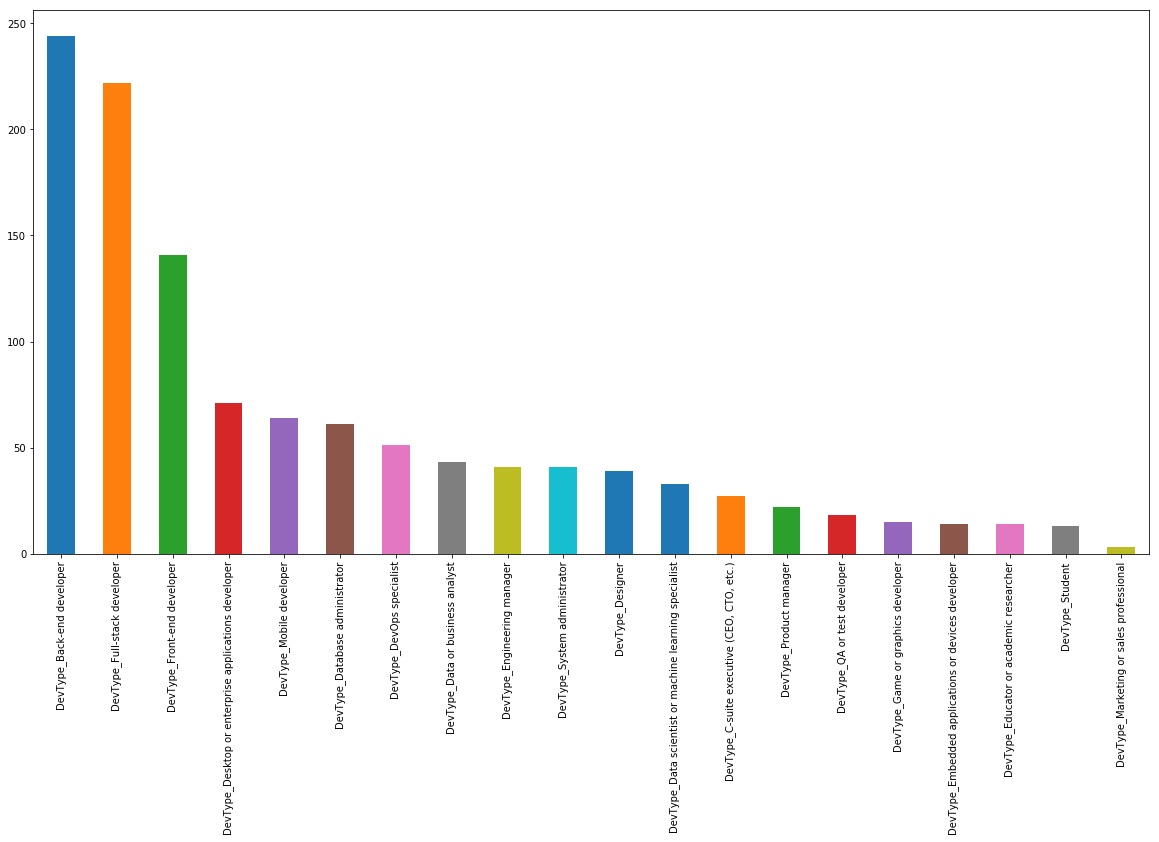

In [60]:
custom_subset = ['DevType_Back-end developer','DevType_Full-stack developer','DevType_Front-end developer','DevType_C-suite executive (CEO, CTO, etc.)','DevType_Data or business analyst','DevType_Data scientist or machine learning specialist','DevType_Database administrator', 'DevType_Designer','DevType_Desktop or enterprise applications developer','DevType_DevOps specialist', 'DevType_Educator or academic researcher','DevType_Embedded applications or devices developer','DevType_Engineering manager','DevType_Game or graphics developer','DevType_Marketing or sales professional', 'DevType_Mobile developer','DevType_Product manager', 'DevType_QA or test developer','DevType_Student', 'DevType_System administrator']
highest_paid[custom_subset].sum().sort_values(ascending=False).plot(kind='bar',figsize=(20, 10))